In [388]:
import pandas as pd
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report

%config InlineBackend.figure_format = 'retina'


In [390]:
submissions_original = pd.read_csv('../data/submissions_no_sanitize_blank.csv').drop(['Unnamed: 0', 'selftext'], axis=1)

In [392]:
submissions_original.head()

,subreddit,title,all,tokens,lems,porter_stems,snowball_stems,word_count,title_char_count,sentences,sentence_count,avg_word_length,avg_sentence_length,sentiment
0,1,Looked up Luis Díaz's stats and Wiki..... Look...,thisisblank Looked up Luis Díaz's stats and Wi...,"['Looked', 'up', 'Luis', ""Díaz's"", 'stats', 'a...","['Looked', 'up', 'Luis', ""Díaz's"", 'stats', 'a...","['look', 'up', 'lui', ""díaz'"", 'stat', 'and', ...","['look', 'up', 'lui', 'díaz', 'stat', 'and', '...",22,101,"[""Looked up Luis Díaz's stats and Wiki..... Lo...",2,4.590909,11.00,0.0000
1,1,Why No Support for Our Boys in Afcon? :(,[removed]Why No Support for Our Boys in Afcon? :(,"['Why', 'No', 'Support', 'for', 'Our', 'Boys',...","['Why', 'No', 'Support', 'for', 'Our', 'Boys',...","['whi', 'no', 'support', 'for', 'our', 'boy', ...","['whi', 'no', 'support', 'for', 'our', 'boy', ...",9,32,"['Why No Support for Our Boys in Afcon?', ':(']",2,3.555556,4.50,-0.3400
2,1,Most valuable left wingers in the world. Opini...,thisisblank Most valuable left wingers in the ...,"['Most', 'valuable', 'left', 'wingers', 'in', ...","['Most', 'valuable', 'left', 'winger', 'in', '...","['most', 'valuabl', 'left', 'winger', 'in', 't...","['most', 'valuabl', 'left', 'winger', 'in', 't...",8,43,"['Most valuable left wingers in the world.', '...",2,5.375000,4.00,0.5256
3,1,We have some really good dancers on this team.,thisisblank We have some really good dancers o...,"['We', 'have', 'some', 'really', 'good', 'danc...","['We', 'have', 'some', 'really', 'good', 'danc...","['we', 'have', 'some', 'realli', 'good', 'danc...","['we', 'have', 'some', 'realli', 'good', 'danc...",9,38,['We have some really good dancers on this tea...,1,4.222222,9.00,0.4927
4,1,[Fabrizio Romano] Liverpool and Porto sources ...,thisisblank [Fabrizio Romano] Liverpool and Po...,"['[Fabrizio', 'Romano]', 'Liverpool', 'and', '...","['[Fabrizio', 'Romano]', 'Liverpool', 'and', '...","['[fabrizio', 'romano]', 'liverpool', 'and', '...","['[fabrizio', 'romano]', 'liverpool', 'and', '...",47,244,['[Fabrizio Romano] Liverpool and Porto source...,4,5.191489,11.75,-0.6249


In [393]:
submissions_original.isnull().sum()

subreddit              0
title                  0
all                    0
tokens                 0
lems                   0
porter_stems           0
snowball_stems         0
word_count             0
title_char_count       0
sentences              0
sentence_count         0
avg_word_length        0
avg_sentence_length    0
sentiment              0
dtype: int64

In [394]:
submissions_original.shape

(57908, 14)

In [395]:
submissions_original.dropna()

,subreddit,title,all,tokens,lems,porter_stems,snowball_stems,word_count,title_char_count,sentences,sentence_count,avg_word_length,avg_sentence_length,sentiment
0,1,Looked up Luis Díaz's stats and Wiki..... Look...,thisisblank Looked up Luis Díaz's stats and Wi...,"['Looked', 'up', 'Luis', ""Díaz's"", 'stats', 'a...","['Looked', 'up', 'Luis', ""Díaz's"", 'stats', 'a...","['look', 'up', 'lui', ""díaz'"", 'stat', 'and', ...","['look', 'up', 'lui', 'díaz', 'stat', 'and', '...",22,101,"[""Looked up Luis Díaz's stats and Wiki..... Lo...",2,4.590909,11.00,0.0000
1,1,Why No Support for Our Boys in Afcon? :(,[removed]Why No Support for Our Boys in Afcon? :(,"['Why', 'No', 'Support', 'for', 'Our', 'Boys',...","['Why', 'No', 'Support', 'for', 'Our', 'Boys',...","['whi', 'no', 'support', 'for', 'our', 'boy', ...","['whi', 'no', 'support', 'for', 'our', 'boy', ...",9,32,"['Why No Support for Our Boys in Afcon?', ':(']",2,3.555556,4.50,-0.3400
2,1,Most valuable left wingers in the world. Opini...,thisisblank Most valuable left wingers in the ...,"['Most', 'valuable', 'left', 'wingers', 'in', ...","['Most', 'valuable', 'left', 'winger', 'in', '...","['most', 'valuabl', 'left', 'winger', 'in', 't...","['most', 'valuabl', 'left', 'winger', 'in', 't...",8,43,"['Most valuable left wingers in the world.', '...",2,5.375000,4.00,0.5256
3,1,We have some really good dancers on this team.,thisisblank We have some really good dancers o...,"['We', 'have', 'some', 'really', 'good', 'danc...","['We', 'have', 'some', 'really', 'good', 'danc...","['we', 'have', 'some', 'realli', 'good', 'danc...","['we', 'have', 'some', 'realli', 'good', 'danc...",9,38,['We have some really good dancers on this tea...,1,4.222222,9.00,0.4927
4,1,[Fabrizio Romano] Liverpool and Porto sources ...,thisisblank [Fabrizio Romano] Liverpool and Po...,"['[Fabrizio', 'Romano]', 'Liverpool', 'and', '...","['[Fabrizio', 'Romano]', 'Liverpool', 'and', '...","['[fabrizio', 'romano]', 'liverpool', 'and', '...","['[fabrizio', 'romano]', 'liverpool', 'and', '...",47,244,['[Fabrizio Romano] Liverpool and Porto source...,4,5.191489,11.75,-0.6249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57903,0,Everton Boosted as Inter Reportedly Look to Se...,thisisblank Everton Boosted as Inter Reportedl...,"['Everton', 'Boosted', 'as', 'Inter', 'Reporte...","['Everton', 'Boosted', 'a', 'Inter', 'Reported...","['everton', 'boost', 'as', 'inter', 'reportedl...","['everton', 'boost', 'as', 'inter', 'report', ...",12,65,['Everton Boosted as Inter Reportedly Look to ...,1,5.416667,12.00,0.3612
57904,0,Everton-Chelsea rating results,I have a feeling this is going to illicit a fe...,"['Everton-Chelsea', 'rating', 'results']","['Everton-Chelsea', 'rating', 'result']","['everton-chelsea', 'rate', 'result']","['everton-chelsea', 'rate', 'result']",3,28,['Everton-Chelsea rating results'],1,9.333333,3.00,0.0000
57905,0,I loved the picture from that Guardian article...,thisisblank I loved the picture from that Guar...,"['I', 'loved', 'the', 'picture', 'from', 'that...","['I', 'loved', 'the', 'picture', 'from', 'that...","['i', 'love', 'the', 'pictur', 'from', 'that',...","['i', 'love', 'the', 'pictur', 'from', 'that',...",20,83,['I loved the picture from that Guardian artic...,1,4.150000,20.00,0.5994
57906,0,Blues Brothers: Phil Jagielka v Leighton Baines,thisisblank Blues Brothers: Phil Jagielka v Le...,"['Blues', 'Brothers:', 'Phil', 'Jagielka', 'v'...","['Blues', 'Brothers:', 'Phil', 'Jagielka', 'v'...","['blue', 'brothers:', 'phil', 'jagielka', 'v',...","['blue', 'brothers:', 'phil', 'jagielka', 'v',...",7,41,['Blues Brothers: Phil Jagielka v Leighton Bai...,1,5.857143,7.00,0.0000


In [397]:
get_text_data = FunctionTransformer(lambda x: x['all'], validate = False)
get_numeric_data = FunctionTransformer(lambda x: x[['sentiment']], validate = False)

In [399]:
X = submissions_original[['all', 'sentiment']]
y = submissions_original['subreddit']

In [400]:
y.value_counts(normalize=True)

1    0.500967
0    0.499033
Name: subreddit, dtype: float64

In [401]:
y.value_counts()

1    29010
0    28898
Name: subreddit, dtype: int64

In [402]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    stratify=y,#stratify = y b/c the data = imbalanced
                                                    random_state=42)

In [403]:
pipe = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('ss', StandardScaler())
            ])),
            ('text_features', Pipeline([
                ('selector', get_text_data),
                ('tvec', TfidfVectorizer())
            ]))
    ])),
    ('logreg', LogisticRegression())
])

params = {
            'features__text_features__tvec__stop_words' : ['english'],
            'features__text_features__tvec__max_features' : [12_500],
            'features__text_features__tvec__ngram_range' : [(1,2)],
            'logreg__C' : [0.7]
}

gs = GridSearchCV(pipe, params, cv=5)

gs.fit(X_train, y_train)
gs.score(X_train, y_train)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

0.9148426369641238

In [404]:
gs.score(X_test, y_test)

0.8796408219651183

In [405]:
gs.best_estimator_

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('numeric_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7fb5a0de5940>)),
                                                                 ('ss',
                                                                  StandardScaler())])),
                                                ('text_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7fb5a0de5d30>)),
                                                                 ('tvec',
                                                                  TfidfVectorizer(max_features=12500,
                                                                                

In [406]:
gs.score(X_train, y_train)

0.9148426369641238

In [407]:
gs.score(X_test, y_test)

0.8796408219651183

In [409]:
def conmat(y_test, preds, classes):

    conmat = confusion_matrix(y_test, preds)
    print(f'Accuracy Score: {accuracy_score(y_test, preds)}')
    return pd.DataFrame(conmat, columns=['Predicted ' +class_ for class_ in classes], \
                index=['Actual '+ class_ for class_ in classes])

preds = gs.best_estimator_.predict(X_test)

conmat(y_test, preds, ['Liverpool', 'Everton'])

Accuracy Score: 0.8796408219651183


,Predicted Liverpool,Predicted Everton
Actual Liverpool,4993,787
Actual Everton,607,5195


In [410]:
# Get predictions
preds = gs.predict(X_test)
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

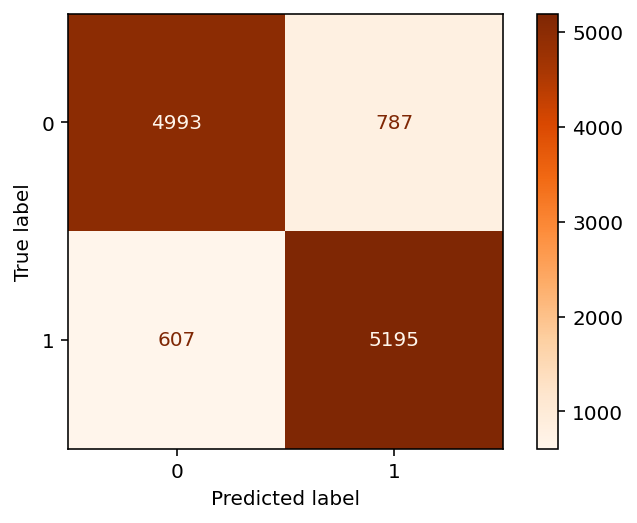

In [427]:
# View confusion matrix in seaborn
plot_confusion_matrix(gs, X_test,y_test,cmap='Oranges',values_format='d')

In [412]:
#Recall Rate or Sensitivity
#Percentage of true positives gotten correct
Recall = tp/(tp + fn)
print(f'Recall: {round(Recall,2)}')

#Precision
#Poportion of correct that are actually correct
precision = tp / (tp+fp)
print(f'Precision: {round(precision,2)}')

 # Calculate the specificity TRUE NEG RATE
#percentage of true negatives gotten correct
specificity = tn/ (tn+fp)
print(f'Specificity: {round(specificity,2)}')

#the mean of precision and recall.
#mean of proportion that are predicted actually positive correctly and actually negative correctly
f1_score = (2*precision*Recall)/ (precision + Recall)
print(f'F1_Score: {round(f1_score,2)}')

Recall: 0.9
Precision: 0.87
Specificity: 0.86
F1_Score: 0.88


In [413]:
# Instantiate the transformer.
tvec = TfidfVectorizer(stop_words='english')

# convert training data to dataframe
X_train_df = pd.DataFrame(tvec.fit_transform(X_train['all']).todense(), 
                          columns=tvec.get_feature_names())

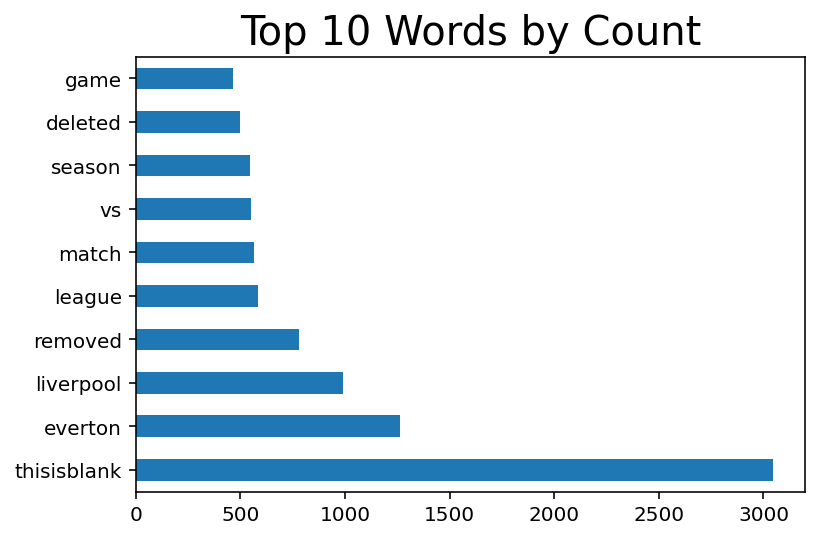

<Figure size 720x3600 with 0 Axes>

In [414]:
X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

plt.title(f'Top 10 Words by Count', fontsize=20)
plt.figure(figsize=(10,50));

In [415]:
X_train_df.sum().sort_values(ascending=False).head(10)

thisisblank    3047.849546
everton        1261.286764
liverpool       990.668252
removed         779.132309
league          584.239532
match           566.247988
vs              551.603682
season          546.149857
deleted         499.044749
game            466.167874
dtype: float64

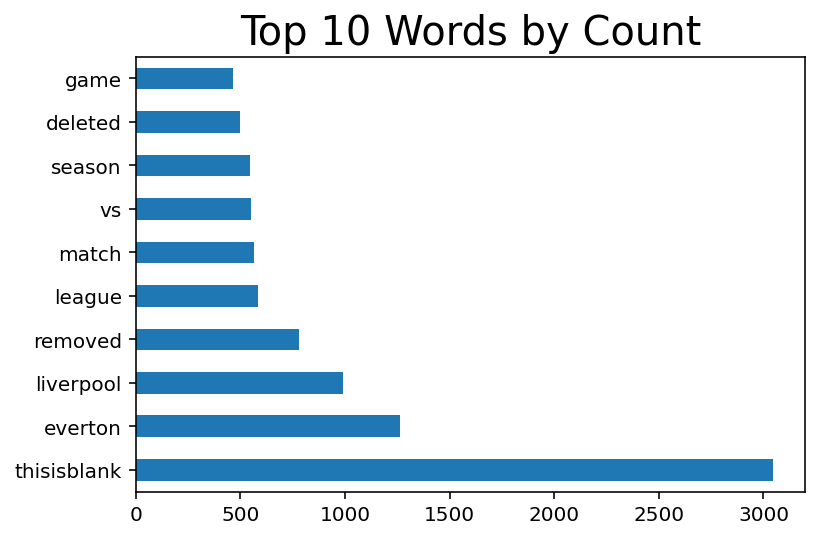

<Figure size 1440x1440 with 0 Axes>

In [416]:
from matplotlib import pyplot as plt

X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

plt.title(f'Top 10 Words by Count', fontsize=20)
plt.figure(figsize=(20,20));

In [426]:
X_train_df.sum().sort_values(ascending=False).head(10)

thisisblank    3047.849546
everton        1261.286764
liverpool       990.668252
removed         779.132309
league          584.239532
match           566.247988
vs              551.603682
season          546.149857
deleted         499.044749
game            466.167874
dtype: float64

In [419]:
features = ['sentiment'] +\
gs.best_estimator_.named_steps['features'].transformer_list[1][1].named_steps['tvec'].get_feature_names()

coefficients = gs.best_estimator_.named_steps['logreg'].coef_[0]

coef_df = pd.DataFrame({'features': features, 
              'coef' : coefficients,
              'exp_coef': [np.exp(coef) for coef in coefficients] #exponentiated coefficients
             })

coef_df

,features,coef,exp_coef
0,sentiment,0.091363,1.095667
1,00,0.994364,2.703006
2,00 arsenal,0.076262,1.079245
3,00 aston,0.030194,1.030654
4,00 brighton,0.064674,1.066811
...,...,...,...
12496,คาส โนออนไลน,0.723651,2.061948
12497,เป,1.316441,3.730121
12498,โนออนไลน,0.723651,2.061948
12499,ได,1.085376,2.960553


In [420]:
coef_df = coef_df.set_index('features')
coef_df = coef_df.sort_values('exp_coef', ascending = False)
coef_df.head(10)

,coef,exp_coef
features,,
liverpool,10.131430,25120.271404
lfc,7.998417,2976.243913
klopp,7.782582,2398.459040
salah,7.331574,1527.784551
anfield,5.388616,218.900180
trent,4.774798,118.486350
jota,4.721673,112.356071
thiago,4.677776,107.530688
alisson,4.549175,94.554398


In [421]:
coef_df = coef_df.sort_values('exp_coef', ascending = False)
coef_df.tail(10)

,coef,exp_coef
features,,
barkley,-4.054108,1.735094e-02
carlo,-4.102153,1.653703e-02
rooney,-4.198124,1.502374e-02
silva,-4.504024,1.106438e-02
richarlison,-4.629697,9.757711e-03
koeman,-4.755159,8.607175e-03
goodison,-5.027777,6.553360e-03
lukaku,-5.221109,5.401336e-03
blues,-5.798302,3.032700e-03


In [422]:
# Top features r/Liverpool
coef_df['exp_coef'].head(25).sort_values(ascending = False)

features
liverpool    25120.271404
lfc           2976.243913
klopp         2398.459040
salah         1527.784551
anfield        218.900180
trent          118.486350
jota           112.356071
thiago         107.530688
alisson         94.554398
fsg             81.314779
ynwa            77.798931
gerrard         73.327496
reds            71.715405
gini            51.717780
mo              50.821847
milner          46.338110
mane            45.881460
hendo           45.052381
matip           39.197852
harvey          34.018097
fabinho         32.517189
kabak           31.303688
henderson       31.122159
robbo           30.765032
origi           29.595635
Name: exp_coef, dtype: float64

In [423]:
#top features r/Everton
coef_df['exp_coef'].tail(10).sort_values(ascending = False)

features
barkley        1.735094e-02
carlo          1.653703e-02
rooney         1.502374e-02
silva          1.106438e-02
richarlison    9.757711e-03
koeman         8.607175e-03
goodison       6.553360e-03
lukaku         5.401336e-03
blues          3.032700e-03
everton        2.040073e-08
Name: exp_coef, dtype: float64

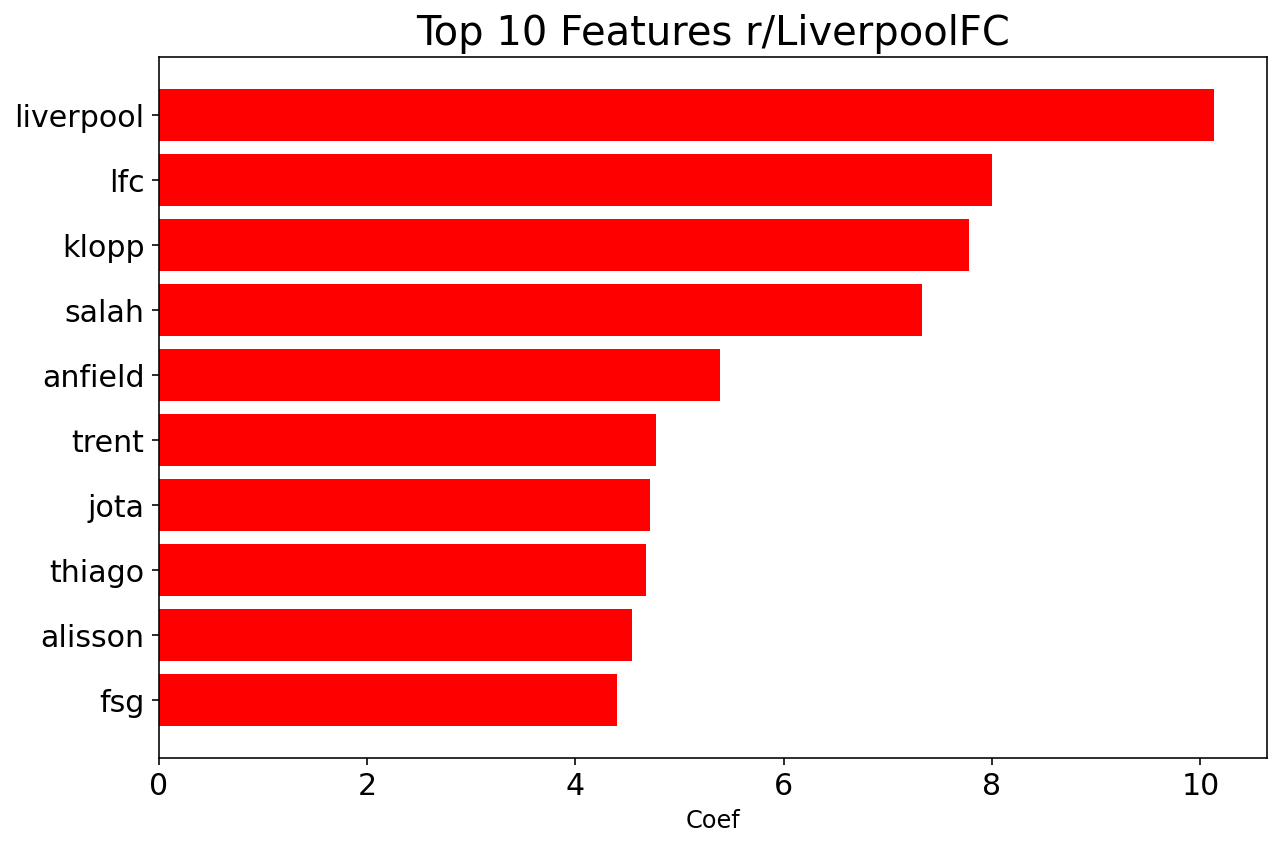

In [435]:
weights = coef_df['coef'].head(10).sort_values() #using the coef version here because of the high exp_coef value for liverpool 
labels = weights.index

plt.figure(figsize=(9,6))
plt.barh(labels, weights, color = 'Red')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Coef', fontsize=12)
plt.title(f'Top 10 Features r/LiverpoolFC', fontsize=20)
plt.tight_layout()
plt.savefig('../images/top_10_features_lfc.png');

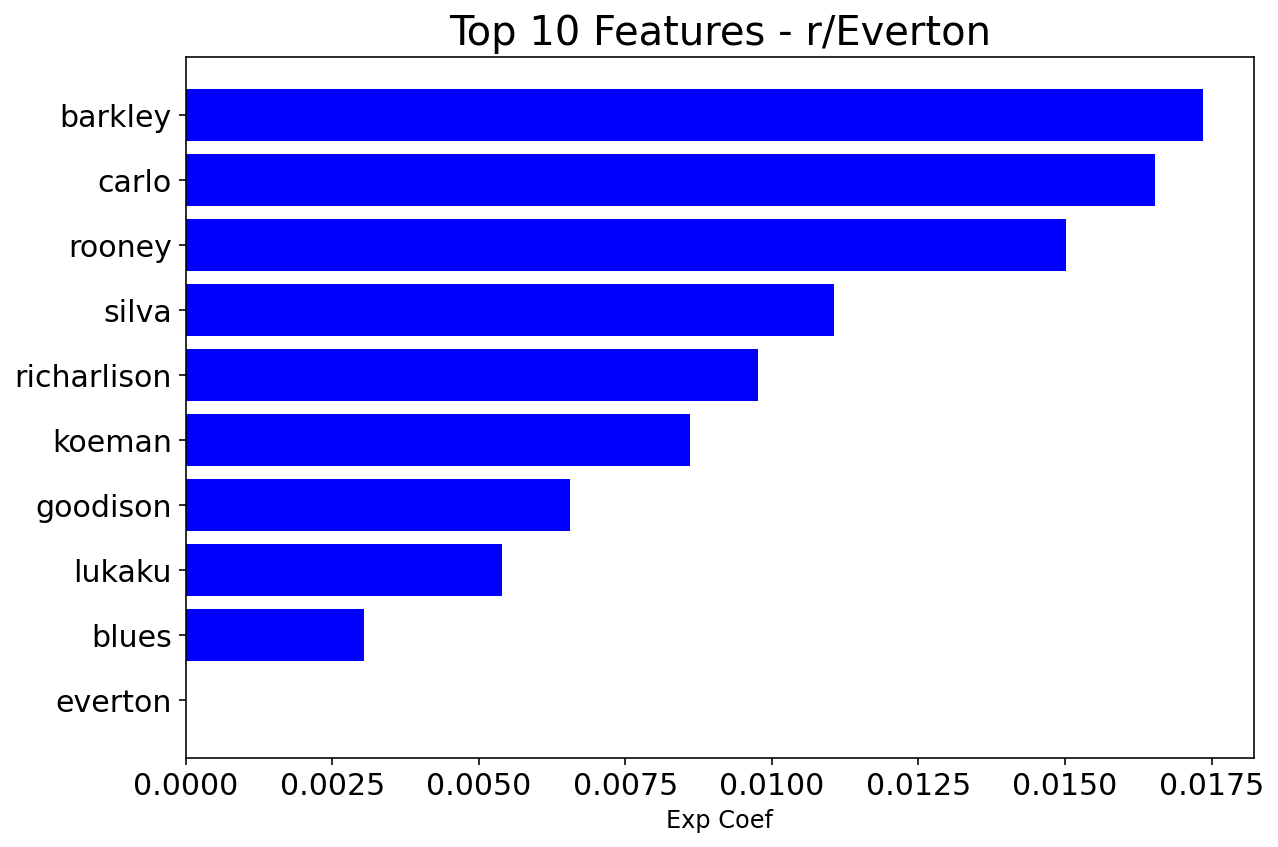

In [433]:
weights = coef_df['exp_coef'].tail(10).sort_values()
labels = weights.index


plt.figure(figsize=(9,6))
plt.barh(labels, weights, color = 'blue')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Exp Coef', fontsize=12)
plt.title(f'Top 10 Features - r/Everton', fontsize=20)
plt.tight_layout()
plt.savefig('../images/top_10_features_everton.png');